In [ ]:
"""
Domain
    Logistics

focus
    Optimal path

Business challenge/requirement
    BluEx is a leading logistics company in India. It's known for efficient delivery of 
    packets to customers. However, BluEx is facing a challenge where its van drivers are 
    taking a suboptimal path for delivery. This is causing delays and higher fuel costs.
    You as an ML expert have to create an ML model using Reinforcement Learning so 
    that an efficient path is found through the program. 

Key issues
    Data has lots of attributes and classification could be tricky

Considerations
    Reinforcement Learning is tricky, so the expectation is to come up with a sample flow 
    and full-fledged implementation will be done by the team later

Data volume
    - None. Sample data is hard coded in the program

Additional information
    - NA

Business benefits
    Up to 15% of fuel cost can be saved by taking the optimal pat
"""

In [3]:
import numpy as np
import pylab as plt
import networkx as nx

In [4]:
# Initializing points
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

In [5]:
goal = 7
mapping = {
    0: 'Start', 
    1: '1', 
    2: '2', 
    3: '3',
    4: '4', 
    5: '5', 
    6: '6', 
    7: '7-Destination'
}

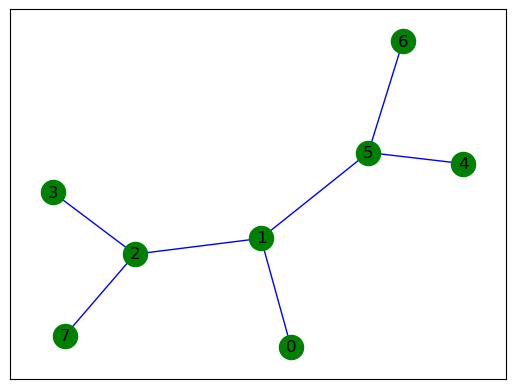

In [7]:
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=0.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()

In [8]:
NO_OF_POINTS = 8

In [9]:
# Initializing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0


R[goal, goal] = 150

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [10]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

In [11]:
# The learning parameter
gamma = 0.8
initial_state = 1

In [12]:
def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [13]:
available_act = available_actions(initial_state)

In [15]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_actions_range, 1))
    return next_action

In [16]:
action = sample_next_action(available_act)

C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\2516765476.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))


In [17]:
def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [18]:
update(initial_state, action, gamma)

max_value 0.0


C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\3827194935.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))


0

In [19]:
scores = []

In [20]:
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\2516765476.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_actions_range, 1))
C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\3827194935.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\1669859401.py:10: RuntimeWarning: invalid value encountered in divide
  print(Q/np.max(Q)*100)
C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\3827194935.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will er

max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 150.0
Score: 100.0
Train

In [22]:
# Testing

current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


C:\Users\Vishv\AppData\Local\Temp\ipykernel_7352\3088603070.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


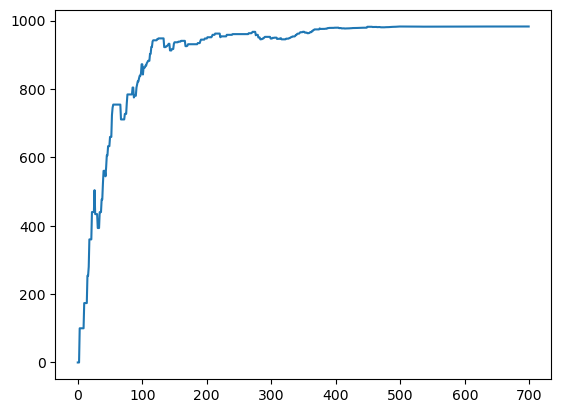

In [23]:
plt.plot(scores)
plt.show()